<b><u>Project Name</u> - <u>TITANIC SURVIVAL PREDICTION<br></u>
<u>Developed By</u> - <u>Hemant Singh<br></u>
<u>Branch</u> - <u>Bachelor of Science(Statistics)<br></u>
<u>Institute Name </u> - <u>National Post Graduate College(University Of Lucknow)<br></u>
<u>Submitted to</u> - <u>CodSoft<br></u>
<u>Project Link</u> (Github) - <u><a href=https://github.com/Specio-BY-Hemant-Singh>Github.com</a><br>
</u><u>Dataset</u> (Source) -<u><a href=https://www.kaggle.com/datasets/yasserh/titanic-dataset>Kaggle.com</a><br></u>


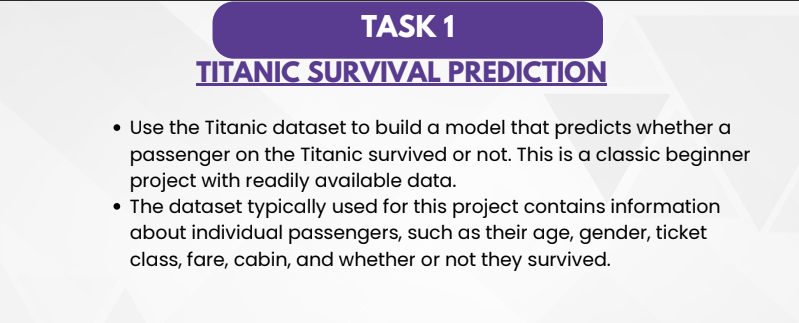

<h3 ><b><u>
PROBLEM STATEMENT:</h3></u>
• Objective The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived. <br>
• Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project
with readily available data.

<h1> Lets Begin!

<h2> Importing Libraries<h2>

In [2]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

<h2>Importing the dataset

In [3]:
tdata=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
tdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h2>Understanding The Data

In [6]:
tdata.shape

(891, 12)

In [7]:
tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
tdata.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
tdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2>Data Wrangling ( Handling Missing Values )

In [11]:
tdata.drop(columns='Cabin',inplace=True)

In [12]:
tdata['Age'].fillna(tdata['Age'].mean(),inplace=True)

In [13]:
tdata["Embarked"] = tdata["Embarked"].fillna(tdata["Embarked"].mode()[0])

In [14]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<h2>Data Visualization

In [15]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

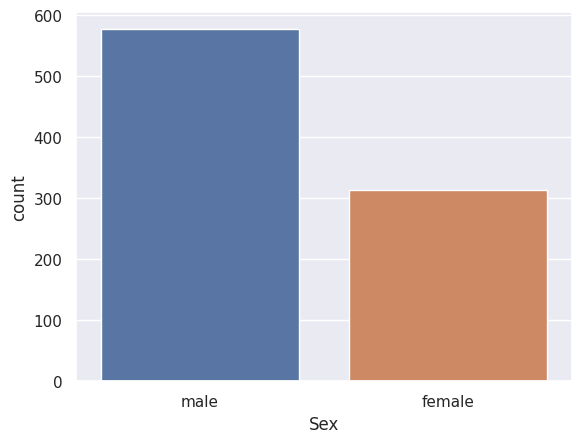

In [16]:
sns.countplot(x='Sex',data=tdata)

In [17]:
tdata['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

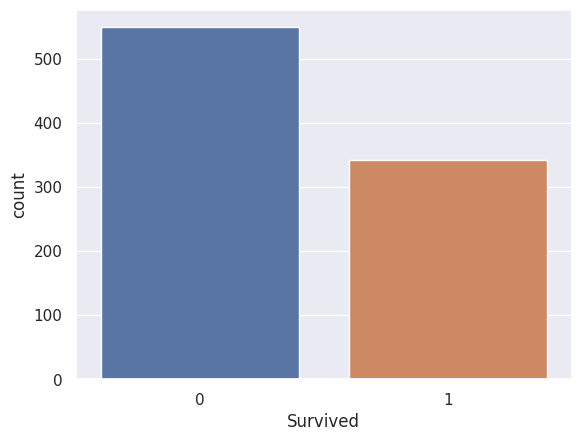

In [18]:
sns.countplot(x='Survived',data=tdata)

<Axes: xlabel='Sex', ylabel='count'>

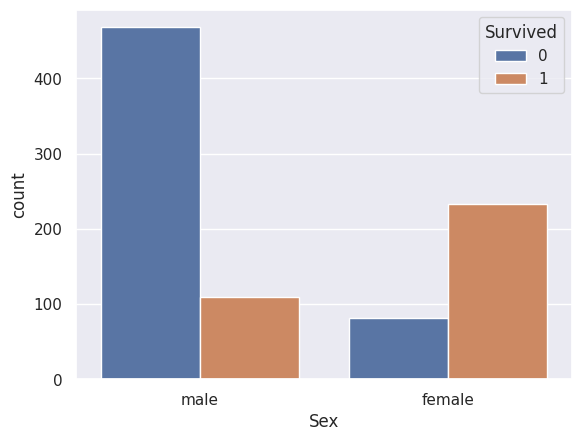

In [19]:
sns.countplot(x='Sex',hue = 'Survived',data=tdata)

In [20]:
tdata['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [21]:
tdata[['Survived','Sex']].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

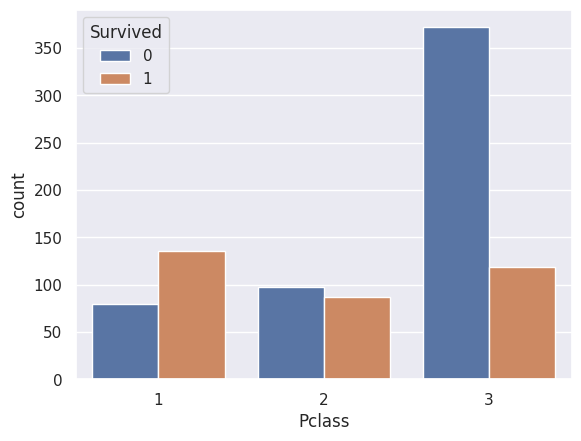

In [22]:
sns.countplot(x='Pclass',hue = 'Survived',data=tdata)

In [23]:
tdata[['Survived','Sex','Pclass']]

,Survived,Sex,Pclass
0,0,male,3
1,1,female,1
2,1,female,3
3,1,female,1
4,0,male,3
...,...,...,...
886,0,male,2
887,1,female,1
888,0,female,3
889,1,male,1


<h3>Converting the categorical data into numerical data 

In [24]:
tdata.replace({'Sex': {'male':0, 'female':1},'Embarked': {'S':0, 'C':1, 'Q':2}},inplace = True)

In [25]:
tdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [26]:
#Dropping the colums  which are irrelevent for the survival prediction ,such as PassengerId, Nme, and Ticket
tdata.drop(columns={'PassengerId','Name','Ticket'},axis=1,inplace=True)

In [27]:
tdata

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


<b><h3>Separating features and target

In [28]:
X=tdata.drop(columns='Survived',axis=1)
Y=tdata['Survived']

In [29]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<h3><b>Splitting the data into traning and testing 

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.05)

In [31]:
xtrain.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<h1><b><u>Model Training
    

Here we are using Logistic Regressing that uses binary classification for prediction.

In [32]:
model=LogisticRegression()

Training Model with training dataset

In [33]:
model.fit(xtrain,ytrain)

LogisticRegression()

<b><h1><u>Model Evaluation</u></h1>
    Accuracy Score | Precision Score | Recall Score
    

In [34]:
#Accuracy on training data
xtrain_predict= model.predict(xtrain)
print(xtrain_predict)

[0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0
 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [35]:
training_data= accuracy_score(ytrain,xtrain_predict)
print("Accuracy score of training data:",training_data)

Accuracy score of training data: 0.8049645390070922


In [36]:
# Accuracy of testing data

xtest_predict=model.predict(xtest)
print(xtest_predict)

[0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1]


In [37]:
testing_data=accuracy_score(xtest_predict,ytest)
print("Accuracy score for test data:",testing_data)

Accuracy score for test data: 0.8


In [38]:
# Recall Score
train_data_recall=recall_score(ytrain,xtrain_predict)
print(train_data_recall)

0.6996904024767802


In [39]:
#Precision Score
test_data_recall= recall_score(ytest,xtest_predict)
print(test_data_recall)

0.7368421052631579


In [40]:
from sklearn import metrics

In [41]:
score=  model.score(xtest,ytest)
print(score)

0.8


In [42]:
cm=metrics.confusion_matrix(ytrain,xtrain_predict)
print(cm)

[[455  68]
 [ 97 226]]


Text(0.5, 1.0, "('Accuracy Score:', 0.8)")

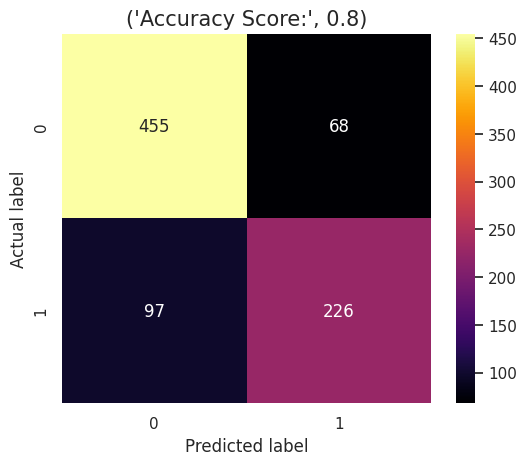

In [43]:
sns.heatmap(cm,annot=True,fmt="d",square=True,cmap="inferno")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title=('Accuracy Score:',score)
plt.title(title,size=15)

<b><u><h1>Random forest classification

In [44]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [45]:
model2 = rfc(n_estimators =100)

In [46]:
model2.fit(xtrain,ytrain)

RandomForestClassifier()

In [47]:
xtest_predict2 = model2.predict(xtest)

In [48]:

acc_score = model2.score(xtrain,ytrain)
model2_acc= accuracy_score(xtest_predict2,ytest)
precision=precision_score(xtest_predict2,ytest)
recall=recall_score(xtest_predict2,ytest)
print("Precision:",precision,"\nRecall Score:",recall)
print ('Accuracy Score:',acc_score,"\nModel 2 Accuracy:",model2_acc)

Precision: 0.6842105263157895 
Recall Score: 0.7647058823529411
Accuracy Score: 0.9846335697399528 
Model 2 Accuracy: 0.7777777777777778


In [49]:
classification_report(xtest_predict,ytest)

'              precision    recall  f1-score   support\n\n           0       0.85      0.81      0.83        27\n           1       0.74      0.78      0.76        18\n\n    accuracy                           0.80        45\n   macro avg       0.79      0.80      0.79        45\nweighted avg       0.80      0.80      0.80        45\n'

<h1><b><u>KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier as knc

In [51]:
model3= knc(n_neighbors=5)

In [52]:
model3.fit(xtrain,ytrain)

KNeighborsClassifier()

In [53]:
xtest_predict3=model3.predict(xtest)

In [54]:
model3_acc=accuracy_score(xtest_predict3,ytest,normalize=True)
model3_score=model3.score(xtrain,ytrain)
model3_precision=precision_score(xtest_predict3,ytest)
model3_recall= recall_score(ytest,xtest_predict)
print(model3_acc)
print(model3_score)
print(model3_precision)
print(model3_recall)

0.6222222222222222
0.8026004728132388
0.5789473684210527
0.7368421052631579


<h3><b>Predicting values

In [56]:
print (X)
print (Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<h4><b> Example 1.

In [59]:
p1=model.predict([[1,0,26.0,0,0,30.000,1]])
print(p1)
p2=model2.predict([[1,0,26.00000,0,0,30.0000,1]])
print(p2)
p3=model3.predict([[1,0,26.00000,0,0,30.0000,1]])
print(p3)

[1]
[1]
[1]


<h4><b> Example 2.

In [61]:
p1=model.predict([[3,0,32.000000,0,0,7.7500,2]])
print(p1)
p2=model2.predict([[3,0,32.000000,0,0,7.7500,2]])
print(p2)
p3=model3.predict([[3,0,32.000000,0,0,7.7500,2]])
print(p3)

[0]
[0]
[0]


<b><h4>Our prediction model  is ready .<br>
For accuracy in prediction ,we choose 2 out of 3 like outputs for the given input.(Since we have use three different model they each ahave diffent accuracy and precision ).


### 